# Logistic Regression: Diabetes prediction
Logistic regression is a clasification algorithm that is used when our output value is qualitative. For this the diabetes dataset was used, that show several parameters that was measured in 768 patients with that data some features were selected and the model predict wether a patients has diabetes or not.

In [1]:
import machine_learning_fundamentals.utils.paths as path
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
import seaborn as sns #to manage data
import numpy as np
%matplotlib inline

In [2]:
data_file = path.data_raw_dir('diabetes.csv')
diabetes = pd.read_csv(data_file)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
feature_cols = ['Pregnancies', 'Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x  = diabetes[feature_cols]
y = diabetes.Outcome

#### Split the data

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=0)

#### Definition and trainig

In [6]:
logreg = LogisticRegression(max_iter=len(X_train))
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)

In [7]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

### Model evaluation: Confusion matrix
The confusion matrix consider the following: 
True positives (VP) are those that were correctly classified as positive as the model.
True negatives (TN) correspond to the number of negatives that were correctly classified as negative by the model.
False negatives (FN) is the number of positives that were incorrectly classified as negatives.
False positives (FP) indicate the number of negatives that were incorrectly classified as positives.
 
![Imagen](/home/alejandrodf1/Documents/machine_learning_fundamentals/reports/figures/Prediccion.jpg)

In [8]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

Text(0.5, 257.44, 'Prediction')

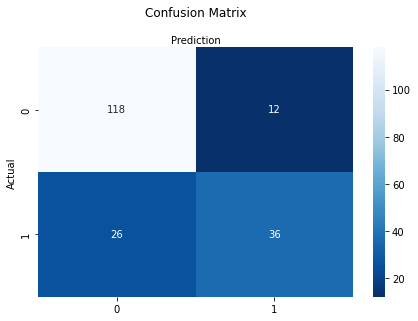

In [9]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt ='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Prediction')

In [10]:
print('Accuracy', metrics.accuracy_score(Y_test,y_pred))

Accuracy 0.8020833333333334
